<a href="https://colab.research.google.com/github/2303a52092/2303A52092-Explainable-AI-LAB_PARTICE/blob/main/practice_prblm_explainable__AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*problem 1*

The marketing department of a car dealership company wants to build a model to predict the number of cars sold based on the number of TV advertisements aired

Regression equation: y = 10.00 + 5.00*TV_Ads
Predicted cars sold for 10 TV ads: 60.00

Results Table:
    TV_Ads  Cars_Sold  Prediction  SHAP_Value  Over/Under
0       1         14        15.0        -5.0         1.0
1       3         24        25.0         5.0         1.0
2       2         18        20.0         0.0         2.0
3       1         17        15.0        -5.0        -2.0
4       3         27        25.0         5.0        -2.0


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


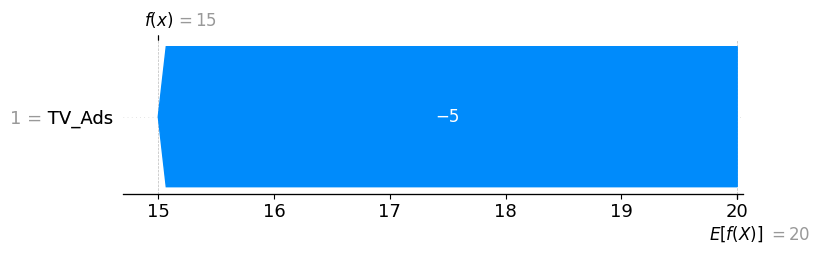

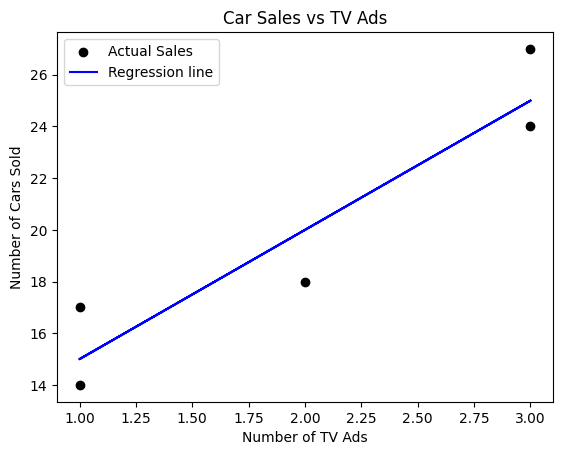

In [1]:
import pandas as pd
import numpy as np
import shap
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


df = pd.read_excel("/content/Car_Sales.xlsx", sheet_name="Sheet1")

X = df[['TV_Ads']]
y = df['Cars_Sold']
model = LinearRegression()
model.fit(X, y)

intercept = model.intercept_
slope = model.coef_[0]
print(f"Regression equation: y = {intercept:.2f} + {slope:.2f}*TV_Ads")

ads_to_predict = np.array([[10]])
y_pred = model.predict(ads_to_predict)[0]
print(f"Predicted cars sold for 10 TV ads: {y_pred:.2f}")

baseline = y.mean()
predictions = model.predict(X)
shap_values_custom = predictions - baseline

results = df.copy()
results['Prediction'] = predictions
results['SHAP_Value'] = shap_values_custom
results['Over/Under'] = results['Prediction'] - results['Cars_Sold']
print("\nResults Table:\n", results)

explainer = shap.Explainer(model, X)
shap_vals = explainer(X)

shap.plots.waterfall(shap_vals[0])

shap.plots.force(shap_vals)

plt.scatter(X, y, color='black', label='Actual Sales')
plt.plot(X, predictions, color='blue', label='Regression line')
plt.xlabel('Number of TV Ads')
plt.ylabel('Number of Cars Sold')
plt.title('Car Sales vs TV Ads')
plt.legend()
plt.show()


Problem 2:

Predicting Student Test Scores Based on IQ and Study Hours

Regression equation: y = 20.00 + 0.50*IQ + 0.50*StudyHours
Predicted test score for IQ=95, StudyHours=25: 80.00

Results with SHAP values:
     IQ  StudyHours  TestScore  IQ_SHAP  StudyHours_SHAP  Prediction  Baseline
0  110          40        100      5.0             10.0        95.0      80.0
1  120          30         90     10.0              5.0        95.0      80.0
2  100          20         80      0.0              0.0        80.0      80.0
3   90           0         70     -5.0            -10.0        65.0      80.0
4   80          10         60    -10.0             -5.0        65.0      80.0


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


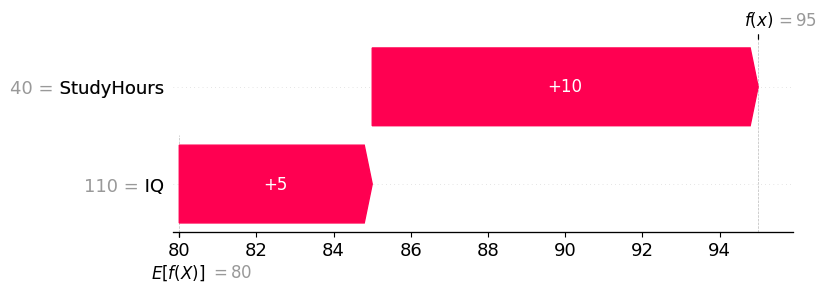

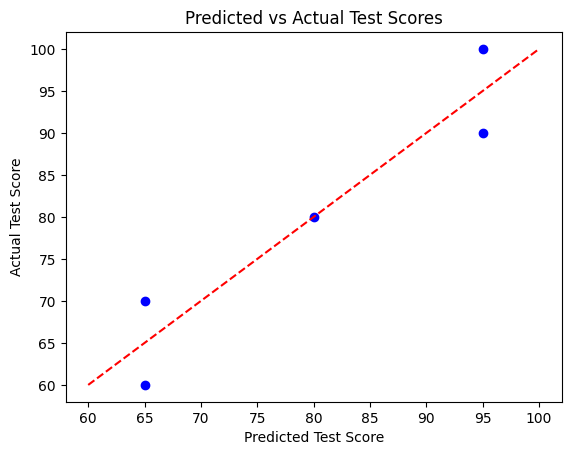


Students where StudyHours contribution > IQ contribution:
     IQ  StudyHours  IQ_SHAP  StudyHours_SHAP
0  110          40      5.0             10.0
3   90           0     -5.0            -10.0


In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import shap
import matplotlib.pyplot as plt

df = pd.read_excel("/content/StudyHour.xlsx", sheet_name="Sheet1")

df.columns = df.columns.str.strip()

X = df[['IQ', 'StudyHours']]
y = df['TestScore']

model = LinearRegression()
model.fit(X, y)

intercept = model.intercept_
coef = model.coef_
print(f"Regression equation: y = {intercept:.2f} + {coef[0]:.2f}*IQ + {coef[1]:.2f}*StudyHours")

example_input = np.array([[95, 25]])
pred_example = model.predict(example_input)[0]
print(f"Predicted test score for IQ=95, StudyHours=25: {pred_example:.2f}")

explainer = shap.Explainer(model, X)
shap_values = explainer(X)

shap_contrib = pd.DataFrame(shap_values.values, columns=['IQ_SHAP', 'StudyHours_SHAP'])
results = pd.concat([df, shap_contrib], axis=1)
results['Prediction'] = model.predict(X)
results['Baseline'] = shap_values.base_values
print("\nResults with SHAP values:\n", results)

shap.plots.waterfall(shap_values[0])

shap.plots.force(shap_values)

plt.scatter(results['Prediction'], y, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel('Predicted Test Score')
plt.ylabel('Actual Test Score')
plt.title('Predicted vs Actual Test Scores')
plt.show()

mask = results['StudyHours_SHAP'].abs() > results['IQ_SHAP'].abs()
print("\nStudents where StudyHours contribution > IQ contribution:\n", results[mask][['IQ', 'StudyHours', 'IQ_SHAP', 'StudyHours_SHAP']])


Problem 3

Predicting Employee Salary Based on Years of Experience

Regression equation: y = 25792.20 + 9449.96 * YearsExperience
Predicted Salary for 3.5 years experience: 58867.07
Predicted Salary for 7 years experience: 91941.94

First 5 rows with SHAP values:
   YearsExperience  Salary    Prediction  Baseline  SHAP_YearsExp
0              1.1   39343  36187.158752   76003.0  -39815.841248
1              1.3   46205  38077.151217   76003.0  -37925.848783
2              1.5   37731  39967.143681   76003.0  -36035.856319
3              2.0   43525  44692.124842   76003.0  -31310.875158
4              2.2   39891  46582.117306   76003.0  -29420.882694


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


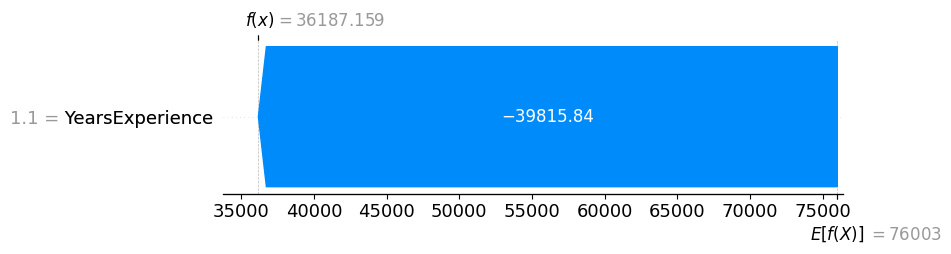

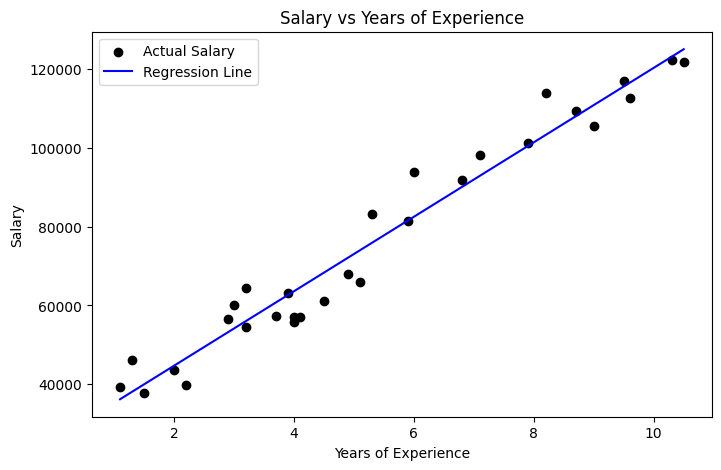

In [3]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import shap
import matplotlib.pyplot as plt

df = pd.read_csv("/content/Experience_Salary.csv")

X = df[['YearsExperience']]
y = df['Salary']

model = LinearRegression()
model.fit(X, y)

intercept = model.intercept_
slope = model.coef_[0]
print(f"Regression equation: y = {intercept:.2f} + {slope:.2f} * YearsExperience")

pred_3_5 = model.predict(np.array([[3.5]]))[0]
pred_7 = model.predict(np.array([[7]]))[0]
print(f"Predicted Salary for 3.5 years experience: {pred_3_5:.2f}")
print(f"Predicted Salary for 7 years experience: {pred_7:.2f}")

explainer = shap.Explainer(model, X)
shap_values = explainer(X)

df['Prediction'] = model.predict(X)
df['Baseline'] = shap_values.base_values
df['SHAP_YearsExp'] = shap_values.values[:, 0]

print("\nFirst 5 rows with SHAP values:")
print(df.head())

shap.plots.waterfall(shap_values[0])

shap.plots.force(shap_values[0])


plt.figure(figsize=(8,5))
plt.scatter(X, y, color='black', label='Actual Salary')
plt.plot(X, df['Prediction'], color='blue', label='Regression Line')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Salary vs Years of Experience')
plt.legend()
plt.show()


Problem 4

Predicting Sales Performance Using Intelligence and Extroversion Scores

In [4]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import shap
import matplotlib.pyplot as plt

df = pd.read_excel('/content/Int_Ext.xlsx', sheet_name='Sheet2')
X = df[['Int', 'Ext']].dropna()
y = df['Sal'].dropna()

model = LinearRegression()
model.fit(X, y)

intercept = model.intercept_
coef = model.coef_
print(f"Sales = {intercept:.2f} + {coef[0]:.2f}*Intelligence + {coef[1]:.2f}*Extroversion")

pred1 = model.predict([[100, 25]])
pred2 = model.predict([[120, 18]])
print(f"Predicted sales for Int=100, Ext=25: ${pred1[0]:.2f}")
print(f"Predicted sales for Int=120, Ext=18: ${pred2[0]:.2f}")

explainer = shap.Explainer(model, X)
shap_values = explainer(X)


shap.plots.waterfall(shap_values[0], show=False)
plt.savefig('shap_waterfall.png')
plt.close()

shap.plots.force(shap_values[0], matplotlib=True, show=False)
plt.savefig('shap_force.png')
plt.close()

shap.summary_plot(shap_values, X, show=False)
plt.savefig('shap_summary.png')
plt.close()

for i, name in enumerate(['Intelligence', 'Extroversion']):
    print(f"{name} coefficient: {coef[i]:.2f}")

print(f"Intercept: {intercept:.2f}")

Sales = 993.92 + 8.22*Intelligence + 49.71*Extroversion
Predicted sales for Int=100, Ext=25: $3058.63
Predicted sales for Int=120, Ext=18: $2875.07


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Intelligence coefficient: 8.22
Extroversion coefficient: 49.71
Intercept: 993.92
